# Analisis systema earnings

In [1]:
from polygon import RESTClient
import json
from typing import cast
from urllib3 import HTTPResponse
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import time
import requests
import numpy as np

Funciones

In [2]:
# Calcula el retorno respecto al día anterior para el token
def calculate_percentage_change_token(df, column_name):
    df_copy = df.copy()
    df_copy['token_RTN'] = df_copy[column_name].pct_change() * 100
    
    # Fill NaN values in the first row with 0
    df_copy['token_RTN'].fillna(0, inplace=True)
    return df_copy['token_RTN']

In [3]:
# Calcula el retorno respecto al día anterior para el sp
def calculate_percentage_change_sp(df, column_name):
    df_copy = df.copy()
    df_copy['sp_RTN'] = df_copy[column_name].pct_change() * 100
    
    # Fill NaN values in the first row with 0
    df_copy['sp_RTN'].fillna(0, inplace=True)
    return df_copy['sp_RTN']

In [4]:
# Calcula el beneficio a 5 dias vistas para el token
def calculate_percentage_profit_token(df, column_name):
    df_copy = df.copy()
    df_copy['close_future'] = df_copy[column_name].shift(-5)  # Shift the close column up by 5
    df_copy['token_PROF'] = (df_copy['close_future'] - df_copy[column_name]) / df_copy[column_name] * 100
    df_copy.drop(columns=['close_future'], inplace=True)  # Drop the auxiliary column
    return df_copy['token_PROF']

In [5]:
# Calcula el beneficio a 5 dias vistas para el sp
def calculate_percentage_profit_sp(df, column_name):
    df_copy = df.copy()
    df_copy['close_future'] = df_copy[column_name].shift(-5)  # Shift the close column up by 5
    df_copy['sp_PROF'] = (df_copy['close_future'] - df_copy[column_name]) / df_copy[column_name] * 100
    df_copy.drop(columns=['close_future'], inplace=True)  # Drop the auxiliary column
    return df_copy['sp_PROF']

Limpieza de Data y cálculos

In [6]:
df= pd.read_csv('Output/all_history_df.csv')
df['fecha'] = pd.to_datetime(df['fecha'])
df.drop(columns=['fecha_h', 'ticker_e', 'fecha_e'], inplace=True)
new_column_order = ['id_hist', 'fecha', 'ticker', 'company_name', 'close', 'fiscal_period', 'ticker_sp', 'close_sp']
df = df[new_column_order]
#df.info()

Resultados

In [7]:
df

,id_hist,fecha,ticker,company_name,close,fiscal_period,ticker_sp,close_sp
0,155430,2022-01-03,AAP,NaN,236.78,NaN,SPY,477.71
1,155429,2022-01-04,AAP,NaN,237.05,NaN,SPY,477.55
2,155428,2022-01-05,AAP,NaN,236.45,NaN,SPY,468.38
3,155427,2022-01-06,AAP,NaN,241.65,NaN,SPY,467.94
4,155426,2022-01-07,AAP,NaN,238.09,NaN,SPY,466.09
...,...,...,...,...,...,...,...,...
44329,424250,2023-11-17,MPC,NaN,147.90,NaN,SPY,450.79
44330,424249,2023-11-20,MPC,NaN,148.99,NaN,SPY,454.26
44331,424248,2023-11-21,MPC,NaN,147.63,NaN,SPY,453.27
44332,424247,2023-11-22,MPC,NaN,149.21,NaN,SPY,455.02


In [8]:
# Ejecuta las funciones y crea las columnas
df['token_RTN'] = round(calculate_percentage_change_token(df, 'close'),2)
df['sp_RTN'] = round(calculate_percentage_change_sp(df, 'close_sp'),2)
df['gas'] = df['token_RTN']-df['sp_RTN']
df['token_PROF'] = round(calculate_percentage_profit_token(df, 'close'),2)
df['sp_PROF'] = round(calculate_percentage_profit_sp(df, 'close_sp'),2)
df

,id_hist,fecha,ticker,company_name,close,fiscal_period,ticker_sp,close_sp,token_RTN,sp_RTN,gas,token_PROF,sp_PROF
0,155430,2022-01-03,AAP,NaN,236.78,NaN,SPY,477.71,0.00,0.00,0.00,-1.12,-2.55
1,155429,2022-01-04,AAP,NaN,237.05,NaN,SPY,477.55,0.11,-0.03,0.14,-2.13,-1.64
2,155428,2022-01-05,AAP,NaN,236.45,NaN,SPY,468.38,-0.25,-1.92,1.67,0.46,0.56
3,155427,2022-01-06,AAP,NaN,241.65,NaN,SPY,467.94,2.20,-0.09,2.29,-0.14,-0.73
4,155426,2022-01-07,AAP,NaN,238.09,NaN,SPY,466.09,-1.47,-0.40,-1.07,0.63,-0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44329,424250,2023-11-17,MPC,NaN,147.90,NaN,SPY,450.79,1.93,0.12,1.81,NaN,NaN
44330,424249,2023-11-20,MPC,NaN,148.99,NaN,SPY,454.26,0.74,0.77,-0.03,NaN,NaN
44331,424248,2023-11-21,MPC,NaN,147.63,NaN,SPY,453.27,-0.91,-0.22,-0.69,NaN,NaN
44332,424247,2023-11-22,MPC,NaN,149.21,NaN,SPY,455.02,1.07,0.39,0.68,NaN,NaN


In [9]:
# Define the conditions
conditions = [
    (df['gas'] > 2) & (df['token_PROF'] > 0),   # Good
    (df['token_PROF'] > 0),                    # Luck
    (df['gas'] > 2) & (df['token_PROF'] <= 0)  # Bad
]
choices = ['good', 'luck', 'bad']
# Use numpy.select to apply conditions and choices
df['profit'] = np.select(conditions, choices, default='neutral')

In [10]:
df_entry = df[df['fiscal_period'].notna()]
df_entry

,id_hist,fecha,ticker,company_name,close,fiscal_period,ticker_sp,close_sp,token_RTN,sp_RTN,gas,token_PROF,sp_PROF,profit
83,155347,2022-05-03,AAP,ADVANCE AUTO PARTS INC,199.92,Q1,SPY,416.38,-0.28,0.46,-0.74,1.49,-4.15,luck
97,155333,2022-05-23,AAP,ADVANCE AUTO PARTS INC,183.24,Q1,SPY,396.92,0.74,1.87,-1.13,3.61,4.03,luck
145,155285,2022-08-02,AAP,ADVANCE AUTO PARTS INC,195.02,Q2,SPY,408.06,-0.49,-0.66,0.17,-1.67,0.81,neutral
160,155270,2022-08-23,AAP,ADVANCE AUTO PARTS INC,199.05,Q2,SPY,412.35,0.29,-0.24,0.53,-14.36,-3.43,neutral
209,155221,2022-11-01,AAP,ADVANCE AUTO PARTS INC,189.28,Q3,SPY,384.52,-0.34,-0.44,0.10,-3.51,-0.66,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42974,81544,2023-02-01,META,"Meta Platforms, Inc. Class A Common Stock",153.12,FY,SPY,410.80,2.79,1.06,1.73,19.79,-0.04,luck
43032,81486,2023-04-26,META,"Meta Platforms, Inc. Class A Common Stock",209.40,Q1,SPY,404.36,0.89,-0.42,1.31,13.19,0.91,luck
43094,81424,2023-07-26,META,"Meta Platforms, Inc. Class A Common Stock",298.57,Q2,SPY,455.51,1.39,0.02,1.37,5.27,-1.18,luck
43158,81360,2023-10-25,META,"Meta Platforms, Inc. Class A Common Stock",299.53,Q3,SPY,417.55,-4.17,-1.44,-2.73,4.11,1.22,luck


In [11]:
#Visor
VALOR = 'META'
df_visor = df_entry[df_entry['ticker'] == VALOR]
df_visor

,id_hist,fecha,ticker,company_name,close,fiscal_period,ticker_sp,close_sp,token_RTN,sp_RTN,gas,token_PROF,sp_PROF,profit
42844,81674,2022-07-27,META,"Meta Platforms, Inc. Class A Common Stock",169.58,Q2,SPY,401.04,6.55,2.60,3.95,-0.46,3.34,bad
42908,81610,2022-10-26,META,"Meta Platforms, Inc. Class A Common Stock",129.82,Q3,SPY,382.02,-5.59,-0.75,-4.84,-30.26,-1.87,neutral
42974,81544,2023-02-01,META,"Meta Platforms, Inc. Class A Common Stock",153.12,FY,SPY,410.80,2.79,1.06,1.73,19.79,-0.04,luck
43032,81486,2023-04-26,META,"Meta Platforms, Inc. Class A Common Stock",209.40,Q1,SPY,404.36,0.89,-0.42,1.31,13.19,0.91,luck
43094,81424,2023-07-26,META,"Meta Platforms, Inc. Class A Common Stock",298.57,Q2,SPY,455.51,1.39,0.02,1.37,5.27,-1.18,luck
43158,81360,2023-10-25,META,"Meta Platforms, Inc. Class A Common Stock",299.53,Q3,SPY,417.55,-4.17,-1.44,-2.73,4.11,1.22,luck
43225,81293,2024-02-01,META,"Meta Platforms, Inc. Class A Common Stock",394.78,FY,SPY,489.20,1.19,1.31,-0.12,19.05,1.86,luck


In [20]:
# Guardamos el Output de las señales de entrada
df_entry.to_csv('summary_output/summary_df_entry', index=False)

Summary

In [13]:
good_profit_rows = df_entry[df_entry['profit'] == 'good']
total_return_good = good_profit_rows['token_PROF'].sum()

bad_profit_rows = df_entry[df_entry['profit'] == 'bad']
total_return_bad = bad_profit_rows['token_PROF'].sum()

luck_profit_rows = df_entry[df_entry['profit'] == 'luck']
total_return_luck = luck_profit_rows['token_PROF'].sum()

neutral_profit_rows = df_entry[df_entry['profit'] == 'neutral']
total_return_neutral = neutral_profit_rows['token_PROF'].sum()

total_returns = df_entry['token_PROF'].sum()


print("***Rendimientos totales según etiquetas***")
print("Rendimiento total para las entradas 'good':", round(total_return_good,2))
print("Rendimiento total para las entradas 'bad':", round(total_return_bad,2))
print("Rendimiento total para las entradas 'luck':", round(total_return_luck,2))
print("Rendimiento total para las entradas 'neutral':", round(total_return_neutral,2))
print("Rendimiento totas sin filtro':", round(total_returns,2))

***Rendimientos totales según etiquetas***
Rendimiento total para las entradas 'good': 221.56
Rendimiento total para las entradas 'bad': -138.45
Rendimiento total para las entradas 'luck': 907.43
Rendimiento total para las entradas 'neutral': -651.55
Rendimiento totas sin filtro': 338.99


In [14]:
# Filter the DataFrame for entries where 'profit' equals 'God'
df_good = df_entry[df_entry['profit'] == 'good']

print('***Filtered by profit equal to Good***')
# Group by 'ticker' and aggregate with rounding for mean, min, and max for 'token_PROF'
summary_stats_filtered = df_good.groupby('ticker').agg({
    'token_PROF': [
        ('mean_rounded', lambda x: round(x.mean(), 2)), 
        ('min_rounded', lambda x: round(x.min(), 2)), 
        ('max_rounded', lambda x: round(x.max(), 2)), 
        'count'
    ]
})
print(summary_stats_filtered)

***Filtered by profit equal to Good***
         token_PROF                              
       mean_rounded min_rounded max_rounded count
ticker                                           
AAP           11.11       11.11       11.11     1
AAPL           0.03        0.03        0.03     1
ABBV           1.39        1.39        1.39     1
BNO            1.83        1.07        2.59     2
CRM            8.15        8.15        8.15     1
ELF           23.27       23.24       23.30     2
ENPH          28.52       28.52       28.52     1
F             12.00        5.05       18.95     2
FOUR          11.02        5.84       15.90     3
GGG            6.00        6.00        6.00     1
GSHD          13.66       12.85       14.48     2
LNG            8.74        8.74        8.74     1
LSCC           3.60        3.60        3.60     1
MDB            9.71        1.28       18.14     2


In [15]:
# Filter the DataFrame for entries where 'profit' equals 'God'
df_bad = df_entry[df_entry['profit'] == 'bad']

print('***Filtered by profit equal to bad***')
# Group by 'ticker' and aggregate with rounding for mean, min, and max for 'token_PROF'
summary_stats_filtered = df_bad.groupby('ticker').agg({
    'token_PROF': [
        ('mean_rounded', lambda x: round(x.mean(), 2)), 
        ('min_rounded', lambda x: round(x.min(), 2)), 
        ('max_rounded', lambda x: round(x.max(), 2)), 
        'count'
    ]
})
print(summary_stats_filtered)

***Filtered by profit equal to bad***
         token_PROF                              
       mean_rounded min_rounded max_rounded count
ticker                                           
AAP           -2.60       -2.60       -2.60     1
AMD           -2.99       -3.78       -1.47     3
AMZN         -12.60      -19.50       -5.30     3
BNO           -3.49       -3.49       -3.49     1
CRM          -13.24      -18.58       -7.90     2
EXPD          -3.20       -3.20       -3.20     1
F             -5.80       -5.80       -5.80     1
FOUR          -5.19       -5.82       -4.56     2
FTNT          -6.28       -6.28       -6.28     1
GSHD          -4.18       -6.87       -1.48     2
INTU          -1.26       -1.26       -1.26     1
KSS           -4.36       -4.36       -4.36     1
LNG           -6.87       -7.08       -6.66     2
MCRI          -4.76       -4.76       -4.76     1
MDB           -0.53       -0.53       -0.53     1
META          -0.46       -0.46       -0.46     1


In [16]:
# Group by 'ticker' and aggregate with rounding for mean, min, and max
print('***Sin filtro, tomamos todas las entradas***')
summary_stats = df_entry.groupby('ticker').agg({
    'token_PROF': [
        ('mean', lambda x: round(x.mean(), 2)), 
        ('min', lambda x: round(x.min(), 2)), 
        ('max', lambda x: round(x.max(), 2)), 
        'count'
    ]
})
print(summary_stats)

***Sin filtro, tomamos todas las entradas***
       token_PROF                    
             mean    min    max count
ticker                               
AAP         -1.29 -18.70  12.20    15
AAPL        -0.18  -6.90   5.38     8
ABBV         1.30  -0.52   3.67     5
ADBE         1.67  -2.09   6.27     7
AMD          1.62  -6.00  15.18    15
AMZN        -3.80 -19.52  16.59     7
BBY         -0.08  -4.21   5.10     8
BNO          0.32  -4.27   5.82    17
COP         -0.10  -5.57   5.10     8
CRM         -1.12 -18.58  16.79     8
CSCO         0.25  -2.35   3.34     6
DELL         1.57  -4.17   5.60     4
DOCS         5.14 -32.63  34.21     8
ELF         13.69  -3.15  23.30     8
ENPH         1.03 -28.50  28.52     7
EXPD         3.25  -6.31  16.78     7
EZA          0.75  -6.77   7.90     7
F            2.41  -5.80  18.95     7
FOUR         6.53  -5.82  28.60     8
FTNT        -1.90  -6.28   0.40     4
GGG          3.61  -7.77  13.94     6
GILD        -0.50  -7.65   5.92     7
GSHD 

Gráficos

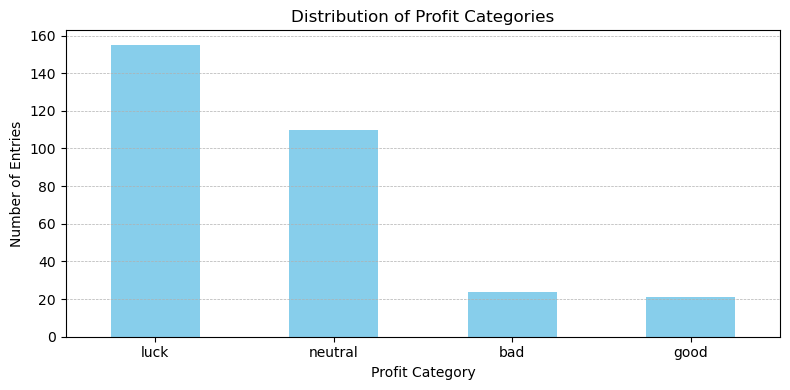

In [17]:
# Count the frequency of each 'profit' category
profit_counts = df_entry['profit'].value_counts()

# Create a histogram (bar plot) of the 'profit' categories
plt.figure(figsize=(8, 4))
profit_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Profit Categories')
plt.xlabel('Profit Category')
plt.ylabel('Number of Entries')
plt.xticks(rotation=0)  # Keep the labels on the x-axis vertical
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

***Rendimientos totales según etiquetas***
Rendimiento total para las entradas 'good': 221.56
Rendimiento total para las entradas 'bad': -138.45
Rendimiento total para las entradas 'luck': 907.43
Rendimiento total para las entradas 'neutral': -651.55
Rendimiento total sin filtro: 338.99


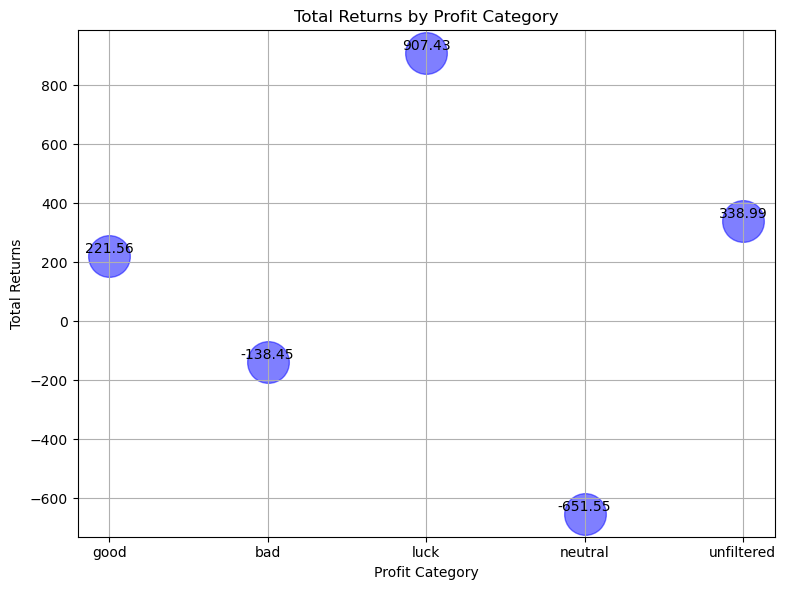

In [18]:
import matplotlib.pyplot as plt

# Assume total_returns_good, total_returns_bad, etc., have been computed
# Calculate unfiltered total returns for comparison
total_returns = df_entry['token_PROF'].sum()

# Data for plotting
categories = ['good', 'bad', 'luck', 'neutral', 'unfiltered']
total_returns_values = [
    round(total_return_good, 2), 
    round(total_return_bad, 2),
    round(total_return_luck, 2),
    round(total_return_neutral, 2),
    round(total_returns, 2)
]

# Print statements for each category
print("***Rendimientos totales según etiquetas***")
print("Rendimiento total para las entradas 'good':", total_returns_values[0])
print("Rendimiento total para las entradas 'bad':", total_returns_values[1])
print("Rendimiento total para las entradas 'luck':", total_returns_values[2])
print("Rendimiento total para las entradas 'neutral':", total_returns_values[3])
print("Rendimiento total sin filtro:", total_returns_values[4])

# Creating the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(categories, total_returns_values, color='blue', s=900, alpha=0.5  )
plt.title('Total Returns by Profit Category')
plt.xlabel('Profit Category')
plt.ylabel('Total Returns')
plt.grid(True)

# Adding text labels above each point
for i, value in enumerate(total_returns_values):
    plt.text(categories[i], value, f'{value}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
